# Basics of ML : Day1

>> Insert image side by side
```
    <table><tr>
    <td> <img class="image-align-left" src="" width="300" /> </td>
    <td> <img class="image-align-left" src="" width="300" />  </td>
    <td> <img class="image-align-left" src="" width="300" /> </td>
    </tr></table>
```


**Table of Content**

>1. Train Test Split
2. Prediction using SVM
3. Support Vector Machine
4. Best model and hyper parameter tunning using GridSearchCV
5. K Fold Cross Validation
6. sklearn.model_selection.StratifiedKFold

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

**Training set and testing set**
`Machine learning` is about learning some properties of a data set and applying them to new data. This is why a
common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we
call the `training set` on which we learn data properties and one that we call the `testing set` on which we test these
properties.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

`digits.data` hols `Data` and `digits.target` holds `Target Value`.

In [3]:
print(digits.data[0])
print(digits.target)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


Data has 2-D array shape with `(n_samples , n_features)` .  In the case of the digits, each original sample is an image of shape (8,8) and can be accessed using :

In [4]:
digits.images.shape

(1797, 8, 8)

### Learning and Predicting

In scikit-learn, an estimator for `classification` is a Python object that implements the methods `fit(X,y)` and
`predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC` that implements [`support vector classification`](https://www.youtube.com/watch?v=FB5EdxAGxQg&ab_channel=codebasics). The
constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider
the estimator as a black box:

> #### Some preprocessing

In [5]:
print(dir(iris))
print(iris.feature_names)
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)
df_iris.sample(5)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
26,5.0,3.4,1.6,0.4
92,5.8,2.6,4.0,1.2
20,5.4,3.4,1.7,0.2
46,5.1,3.8,1.6,0.2


In [6]:
df_iris['target'] = iris.target
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
87,6.3,2.3,4.4,1.3,1
2,4.7,3.2,1.3,0.2,0
30,4.8,3.1,1.6,0.2,0
57,4.9,2.4,3.3,1.0,1
56,6.3,3.3,4.7,1.6,1


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df_iris['target_flower_name'] = df_iris.target.apply(lambda x : iris.target_names[x])
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_flower_name
104,6.5,3.0,5.8,2.2,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
5,5.4,3.9,1.7,0.4,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
72,6.3,2.5,4.9,1.5,1,versicolor


In [9]:
df_iris_setosa = df_iris[df_iris.target == 0]
df_iris_versicolor = df_iris[df_iris.target == 1]
df_iris_virginica = df_iris[df_iris.target == 2]

In [10]:
%matplotlib inline

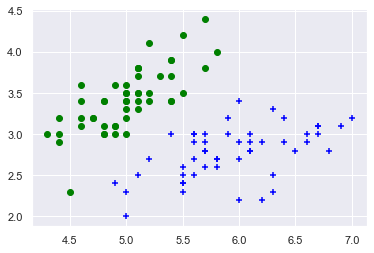

In [11]:
plt.scatter(df_iris_setosa['sepal length (cm)'],df_iris_setosa['sepal width (cm)'],color = 'green',marker='o')
plt.scatter(df_iris_versicolor['sepal length (cm)'],df_iris_versicolor['sepal width (cm)'],color = 'blue',marker='+')
# plt.scatter(df_iris_virginica['sepal length (cm)'],df_iris_virginica['sepal width (cm)'],color = 'red',marker='*')

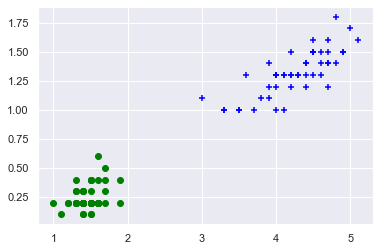

In [12]:
plt.scatter(df_iris_setosa['petal length (cm)'],df_iris_setosa['petal width (cm)'],color = 'green',marker='o')
plt.scatter(df_iris_versicolor['petal length (cm)'],df_iris_versicolor['petal width (cm)'],color = 'blue',marker='+')

### train_test_split and SVC

In [13]:
from sklearn.model_selection import train_test_split
X = df_iris.drop(['target','target_flower_name'],axis='columns')
y = df_iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [15]:
model.score(X_test,y_test)

1.0

### Support Vector Machines


Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.


The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

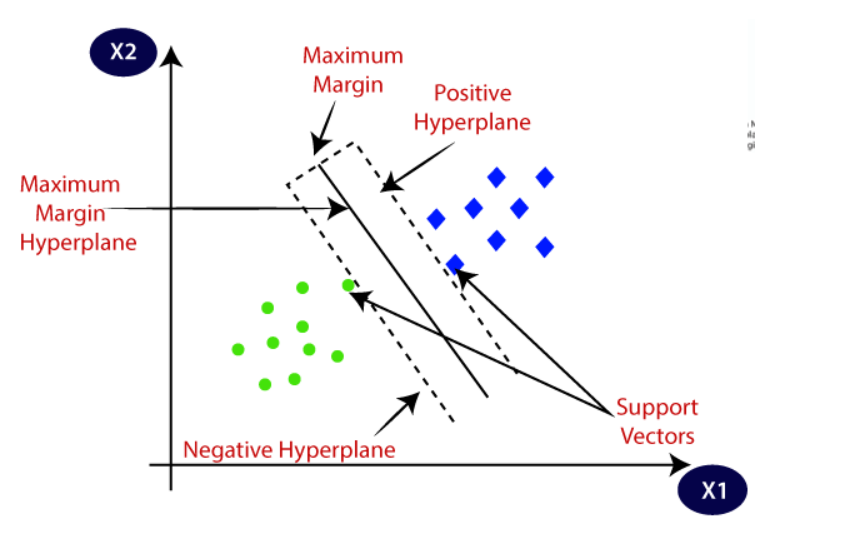

`Types : `
1. `Linear SVM:` Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.


2. `Non-linear SVM:` Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

**Hyperplane:** There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.

**Support vector :** The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.

<!-- <img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm4.png"  width="300" height="300">
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm5.png"  width="300" height="300"> -->

#### Linear SVM()

Possible Hyperplane             |  Most Accurate
:-------------------------:|:-------------------------:
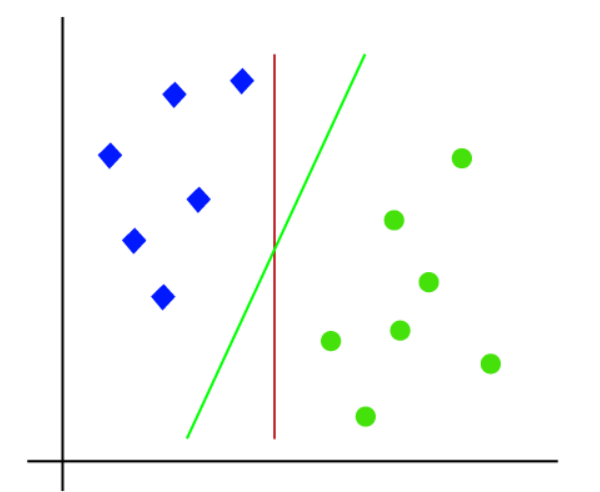  |  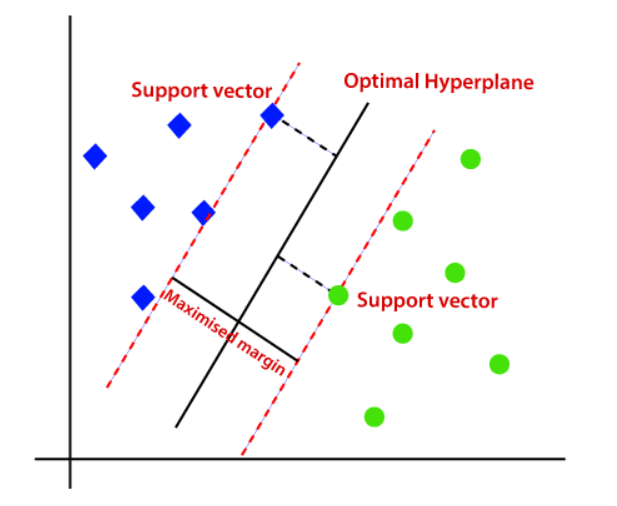


The goal of `SVM` is to `maximize this margin`. The hyperplane with maximum margin is called the optimal hyperplane.


#### Non-Linear SVM()


<table><tr>
<td> <img class="image-align-left" src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm6.png" width="300" /> </td>
<td> <img class="image-align-left" src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm7.png" width="300" />  </td>
<td> <img class="image-align-left" src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm8.png" width="300" /> </td>
<td> <img class="image-align-left" src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm9.png" width="300" /> </td>
</tr></table>

It is not possible to draw straight line in this type of non-linear data to classify the model. In this case we can add another axis `z = x^2 + y^2` and got `z plane` that can be classified using a straight line.

Since we are in 3-d Space, hence it is looking like a plane parallel to the x-axis. If we convert it in 2d space with z=1, then it will become as last picture.

[Video tutorial](https://youtube.com/playlist?list=PLKnIA16_RmvbOIFee-ra7U6jR2oIbCZBL)

## Finding best model and hyper parameter tunning using GridSearchCV

[Tutorial](https://youtu.be/HdlDYng8g9s)

In [17]:
from sklearn import svm, datasets
iris = datasets.load_iris()

import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])

In [20]:
df[124:127]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
124,6.7,3.3,5.7,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
126,6.2,2.8,4.8,1.8,virginica


### **Approach 1: Use train_test_split and manually tune parameters by trial and error**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9777777777777777

### **Approach 2: Use K Fold Cross validation**

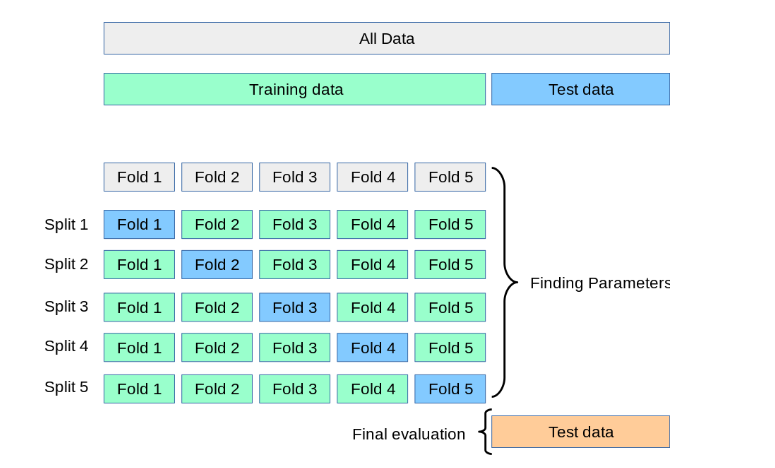

Fold tha data set in k. Then in each iteration take one fold as for testing and others are as training.

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [33]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [34]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [35]:
cross_val_score(svm.SVC(kernel='rbf',C=50,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ])

In [36]:
#Selecting differnt kernels and C values and taking their average to notice which model is performing well
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

### Approach 3: Use GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_
#cv is cross validation / number of folds

{'mean_fit_time': array([0.00123425, 0.00099173, 0.00040011, 0.00039949, 0.00079269,
        0.00099936]),
 'std_fit_time': array([1.02765844e-03, 2.18371636e-05, 4.90038947e-04, 4.89279924e-04,
        3.97097417e-04, 6.32334484e-04]),
 'mean_score_time': array([0.00068665, 0.00011249, 0.00060701, 0.00079989, 0.00060086,
        0.00020089]),
 'std_score_time': array([0.00059503, 0.00022497, 0.0004958 , 0.0004005 , 0.0004906 ,
        0.00040178]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [38]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001234,0.001028,0.000687,0.000595,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000992,0.000022,0.000112,0.000225,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000400,0.000490,0.000607,0.000496,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000399,0.000489,0.000800,0.000400,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000793,0.000397,0.000601,0.000491,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000999,0.000632,0.000201,0.000402,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [39]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [40]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [42]:
print("Best param : " + str(clf.best_score_) + "\n" + "Best Score : " + str(clf.best_params_))

Best param : 0.9800000000000001
Best Score : {'C': 1, 'kernel': 'rbf'}


**Use `RandomizedSearchCV` to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation**

In [50]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=5
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,0.966667
1,1,rbf,0.980000
2,10,linear,0.973333
3,20,rbf,0.966667
4,10,rbf,0.980000


In [51]:
dir(rs)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [52]:
print("Best param : " + str(rs.best_score_) + "\n" + "Best Score : " + str(rs.best_params_))

Best param : 0.9800000000000001
Best Score : {'kernel': 'rbf', 'C': 1}


## K Fold Cross Validation
[Tutorial](https://youtu.be/gJo0uNL-5Qw)

In [71]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [72]:
iris = load_iris()

**Logistic Regression**

In [73]:
l_scores = cross_val_score(LogisticRegression(), iris.data, iris.target)
l_scores

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [74]:
np.average(l_scores)

0.9733333333333334

**Decision Tree**

In [75]:
d_scores = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target)
d_scores

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [76]:
np.average(d_scores)

0.9666666666666668

**Support Vector Machine (SVM)**

In [77]:
s_scores = cross_val_score(SVC(), iris.data, iris.target)
s_scores

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [78]:
np.average(s_scores)

0.9666666666666666

**Random Forest**

In [79]:
r_scores = cross_val_score(RandomForestClassifier(n_estimators=40), iris.data, iris.target)
r_scores

array([0.96666667, 0.96666667, 0.93333333, 0.9       , 1.        ])

In [80]:
np.average(r_scores)

0.9533333333333334

## sklearn.model_selection.KFold

`class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)`

[DOC](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [82]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [83]:
print(kf)

KFold(n_splits=3, random_state=None, shuffle=False)


In [84]:
X = [1,2,3,4,5,6,7,8,9]
y = [1,4,9,16,25,36,49,86,81]
for train_index, test_index in kf.split(X):
    print("Train Index : " + str(train_index) + "\n" + "Test Index : " + str(test_index) + "\n")

Train Index : [3 4 5 6 7 8]
Test Index : [0 1 2]

Train Index : [0 1 2 6 7 8]
Test Index : [3 4 5]

Train Index : [0 1 2 3 4 5]
Test Index : [6 7 8]



In [85]:
#When suffle = True
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,random_state=None,shuffle=True)
print(kf)
for train_index, test_index in kf.split(X):
    print("Train Index : " + str(train_index) + "\n" + "Test Index : " + str(test_index) + "\n")

KFold(n_splits=3, random_state=None, shuffle=True)
Train Index : [0 1 2 4 5 7]
Test Index : [3 6 8]

Train Index : [1 2 3 5 6 8]
Test Index : [0 4 7]

Train Index : [0 3 4 6 7 8]
Test Index : [1 2 5]



## sklearn.model_selection.StratifiedKFold
[Tutorial](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

In [86]:
from sklearn.model_selection import StratifiedKFold

In [96]:
skf = StratifiedKFold(n_splits=2,random_state=None,shuffle=False)
X = np.array([[1, 2,3], [3,2,4], [1,3, 2], [3,1, 4]])
y = np.array([0, 0, 1, 1])
print(skf)
for train_index, test_index in skf.split(X,y):
    print("Train Index : " + str(train_index) + "\n" + "Test Index : " + str(test_index) + "\n")

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
Train Index : [1 3]
Test Index : [0 2]

Train Index : [0 2]
Test Index : [1 3]

